In [8]:
import os
import time
import requests
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [10]:
combined_consolidated_df = pd.read_csv("df_final.csv")

In [11]:
# Detailed column stats sorted by non-null count (descending)
col_stats = pd.DataFrame({
    'non_null_count': combined_consolidated_df.notna().sum(),
    'null_count': combined_consolidated_df.isna().sum(),
    'unique_count': combined_consolidated_df.nunique(dropna=True)
}).sort_values('non_null_count', ascending=False)



In [12]:
combined_consolidated_df['surveyyear'].value_counts()

surveyyear
2018    19771
2023    17837
2019    17777
2021    16688
2022    14654
2024    13087
2020    12892
2016    11206
2017    10278
2025     9825
2015     5217
2013      879
2014      690
2012      512
2011      251
Name: count, dtype: int64

In [29]:
# Add percent of total rows for nulls (rounded to 2 decimals)
total_rows = combined_consolidated_df.shape[0]
col_stats['null_pct'] = (col_stats['null_count'] / total_rows * 100).round(2)

In [30]:
col_stats.head(50)

,non_null_count,null_count,unique_count,null_pct
Unnamed: 0.2,151564,0,151564,0.00
gender_mapped_exact,151564,0,7,0.00
surveyyear,151564,0,15,0.00
Unnamed: 0.1,151564,0,151564,0.00
gender_update,151564,0,7,0.00
Unnamed: 0,151564,0,151564,0.00
country,141522,10042,229,6.63
employment,140846,10718,151,7.07
education_clean,137278,14286,12,9.43
education,137278,14286,554,9.43


In [15]:
print(sorted(combined_consolidated_df['surveyyear'].dropna().unique()))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [16]:
# extract surveyyear and country and make a counts matrix
cols = ['surveyyear', 'country']
df_sub = combined_consolidated_df[cols].copy()

# drop rows missing either value
#df_sub = df_sub.dropna(subset=['surveyyear', 'country'])

# ensure surveyyear is treated consistently (optional)
# df_sub['surveyyear'] = df_sub['surveyyear'].astype(str)

# Create matrix: rows = surveyyear, cols = country, values = counts
matrix_df = pd.crosstab(df_sub['surveyyear'], df_sub['country']).sort_index()

# display and optionally save
display(matrix_df)
matrix_df.to_csv('surveyyear_by_country_matrix.csv')

country,Afghanistan,Africa,Aland Islands,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,Armenia,Aruba,Australasia,Australia,Austria,Azerbaidjan,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Bouvet Island,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Central America,Chad,Chile,China,Colombia,"Congo, Republic of the...",Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Côte d'Ivoire,Democratic People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Heard and McDonald Islands,Honduras,Hong Kong,Hungary,I prefer not to say,Iceland,India,Indonesia,Iran,"Iran, Islamic Republic of...",Iraq,Ireland,Isle of Man,Israel,Italy,Ivory Coast,Ivory Coast (Cote D'Ivoire),Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macedonia,Macedonia [FYROM],Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Micronesia,"Micronesia, Federated States of...",Middle East,Moldavia,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Myanmar [Burma],Namibia,Nepal,Netherlands,Netherlands Antilles,New Caledonia (French),New Zealand,Nicaragua,Niger,Nigeria,Nomadic,North America (Other),North Korea,Norway,Oman,Other,Other Asia,Other Europe,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Pitcairn Island,Poland,Polynesia (French),Portugal,Puerto Rico,Qatar,Republic of Moldova,Republic of North Macedonia,Reunion (French),Romania,Russia,Russian Federation,Rwanda,Saint Helena,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovakia,Slovenia,Somalia,South Africa,South America,South Korea,Spain,Sri Lanka,St Kitts & Nevis,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States,Uruguay,Uzbekistan,Vatican,Vatican City,Venezuela,"Venezuela, Bolivarian Republic of...",Vietnam,Yemen,Zaire,Zambia,Zimbabwe
surveyyear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,8,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,89,0,0,0,0,0,0,0,0,0,0,0
2012,0,10,0,0,0,0,0,0,0,0,0,0,0,0,10,16,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,15,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,147,0,0,0,0,0,0,0,0,0,0,0
2013,0,14,0,0,0,0,0,0,0,0,0,0,0,0,11,20,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,51,0,0,0,0,0,0,0,0,0,0,0,0,73,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

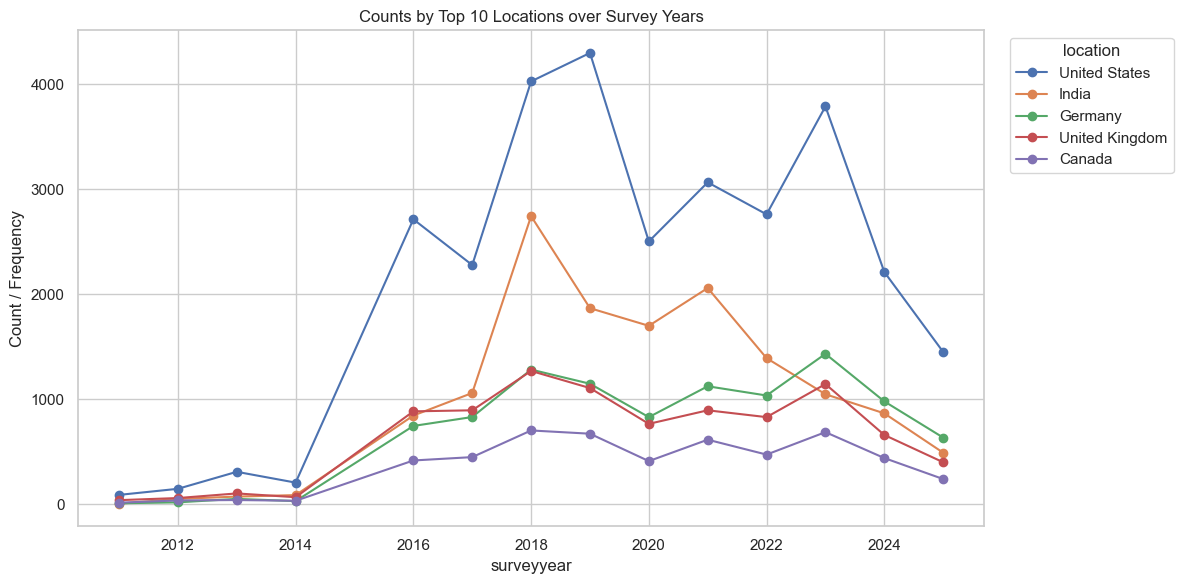

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# prepare a plotting-friendly copy (try numeric years first, otherwise keep strings)
matrix_plot = matrix_df.copy()
years_numeric = pd.to_numeric(matrix_plot.index, errors='coerce')
if years_numeric.notna().all():
    matrix_plot.index = years_numeric
matrix_plot = matrix_plot.sort_index()

# Select top 10 countries by total count
top_countries = matrix_plot.sum(axis=0).sort_values(ascending=False).head(5).index
matrix_plot_top = matrix_plot[top_countries]

sns.set(style='whitegrid')
ax = matrix_plot_top.plot(kind='line', figsize=(12,6), marker='o', linewidth=1.5)
ax.set_xlabel('surveyyear')
ax.set_ylabel('Count / Frequency')
ax.set_title('Counts by Top 10 Locations over Survey Years')
ax.legend(title='location', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Save and show
plt.savefig('surveyyear_by_top10_location_lineplot.png', bbox_inches='tight', dpi=150)
plt.show()
